In [1]:
from sr_tiny_radar_loader import get_sr_tiny_radar_data_loader
import numpy as np
import matplotlib.pyplot as plt
import torch


In [2]:
gestures = [
    "PinchIndex",
    "PinchPinky",
    # "FingerSlider",
    # "FingerRub",
    # "SlowSwipeRL",
    # "FastSwipeRL",
    # "Push",
    # "Pull",
    # "PalmTilt",
    # "Circle",
    # "PalmHold",
    # "NoHand",
]
persons = 14
people = list(range(1, persons, 1))

# Dataset parameters
numberOfTimeSteps = 5
numberOfSensors = 2
numberOfRangePointsPerSensor = 492
numberOfInstanceWindows = 3
lengthOfSubWindow = 32
numberOfGestures = 12
batch_size = 128
epochs = 150
data_dir ="/Users/netanelblumenfeld/Desktop/data/11G/"

# paths
row = 8
col = 64
hight_res_folder = "data_feat/"
low_res_folder = f"data_feat_ds_row_{row}_col_{col}_d_none_u_cubic/"
hight_res__path = data_dir + hight_res_folder
low_res_path = data_dir + low_res_folder

training_generator, val_generator = get_sr_tiny_radar_data_loader(
    low_res_path,
    hight_res__path,
    people,
    gestures,
    batch_size,
    scale=True,
)

Doing 1
Doing 2
Doing 3
Doing 4
Doing 5
Doing 6
Doing 7
Doing 8
Doing 9
Doing 10
Doing 11
Doing 12
Doing 13


In [3]:
for a , b in training_generator:
    print(a.shape)
    print(b[0].shape)
    print(b[1].shape)
    break

torch.Size([128, 5, 2, 32, 492])
torch.Size([128, 5, 2, 32, 492])
torch.Size([128, 5])


In [5]:
# Dataset parameters
import os
import sys
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__vsc_ipynb_file__), '../')))

from dataclasses import dataclass

from network.models.super_resolution.srcnn import SRCnn
from network.models.sr_classifier.SRCnnTinyRadar import CombinedSRCNNClassifier

# Add the parent dire
# ctory of medflowlabs to the Python path

from network.models.classifiers.tiny_radar import TinyRadarNN


numberOfTimeSteps = 5
numberOfSensors = 2
numberOfRangePointsPerSensor = 492
lengthOfSubWindow = 32
numberOfGestures = 12
tiny_radar = TinyRadarNN(
    numberOfSensors,
    numberOfRangePointsPerSensor,
    lengthOfSubWindow,
    numberOfTimeSteps,
    numberOfGestures,
)

srcnn = SRCnn(
    num_features_1=64,
    num_features_2=64,
    kernel_size=(3,3),
    activation='relu',
)
model = CombinedSRCNNClassifier(srcnn, tiny_radar)
tiny_radar_wights_path = '/Users/netanelblumenfeld/Desktop/bgu/Msc/project/outputs/models/sr_classifier/row_8_col_64_d_none_u_cubic/w_tiny1_w_srcnn_0_norm_full_train/n_feat1_64_n_feat2_64_ksize_(3, 3)_activation_relu/time_2023-12-18_17:44:52/max_acc_model.pt'

model.load_state_dict(torch.load(tiny_radar_wights_path,map_location=torch.device('cpu') ))


<All keys matched successfully>

In [6]:
model.eval()
higt_imgs, labels = model(a)

In [7]:
print(higt_imgs.shape)

torch.Size([128, 5, 2, 32, 492])


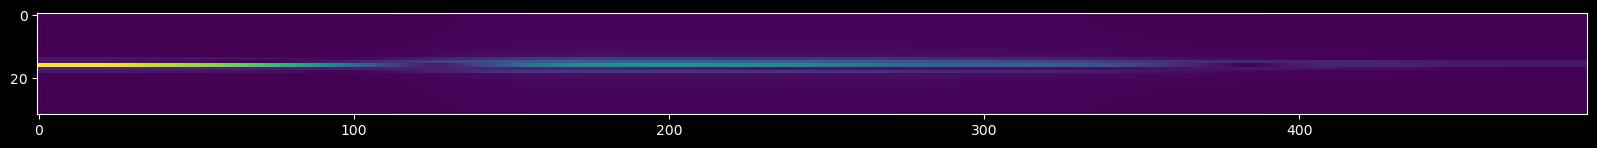

In [8]:
plt.figure(figsize=(20,10))

plt.imshow(a[0,0,0])

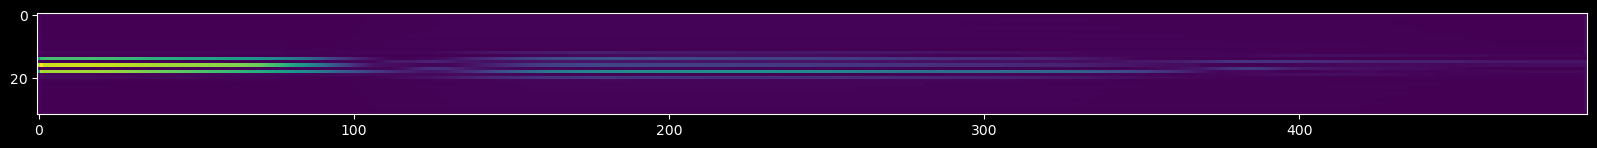

In [9]:
res_img = higt_imgs[0,0,0].detach().numpy()
plt.figure(figsize=(20,10))

plt.imshow(res_img)

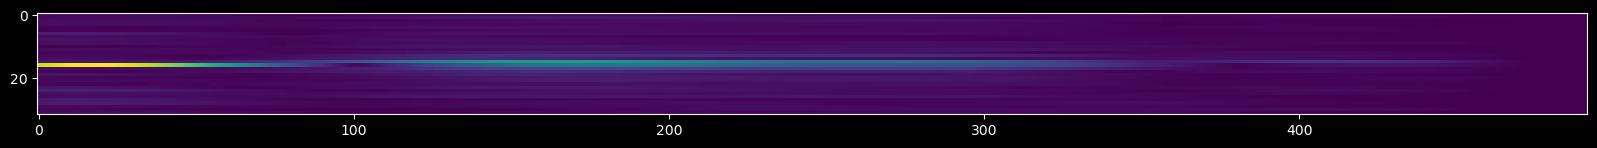

In [10]:
plt.figure(figsize=(20,10))

plt.imshow(b[0][0,0,0,:,:])

In [11]:
a[0,0,0].numpy().max()

0.9999674

In [12]:
res_img.min()

-0.37187704

In [35]:
import torch.nn as nn
import torch

aa = res_img.reshape(1,1,32,492)
bb = nn.BatchNorm2d(1)
c = bb(torch.Tensor(aa))

In [37]:
c.max()

tensor(7.7518, grad_fn=<MaxBackward1>)

In [31]:
aa.shape

(32, 492)

In [28]:
x_orig = a[0,0,0,:,:].numpy()
x_low = b[0][0,0,0,:,:].numpy()

In [29]:
b = b[0].permute(1, 0, 2, 3, 4)
a = a.permute(1, 0, 2, 3, 4)
b.shape


torch.Size([5, 128, 2, 32, 492])

In [30]:
b1 = b[0].reshape(128*2,1,32,492)
b2 = b1.reshape(128,2,32,492)
b2.shape

torch.Size([128, 2, 32, 492])

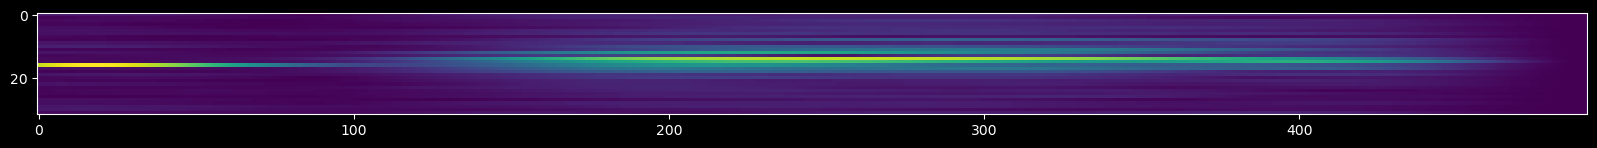

In [34]:
res = b2[0,0,:,:].numpy()
plt.figure(figsize=(20,10))
plt.imshow(res)

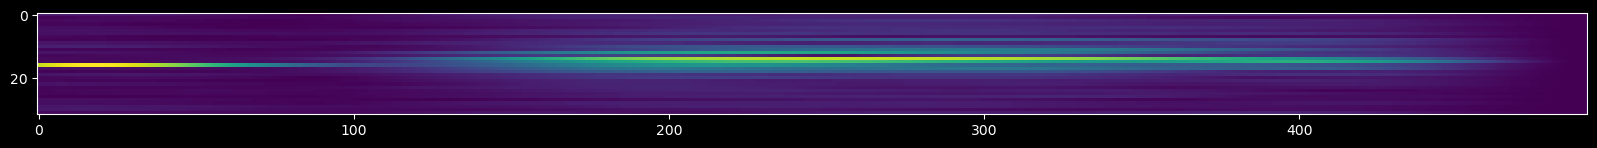

In [36]:
plt.figure(figsize=(20,10))

plt.imshow(x_low)

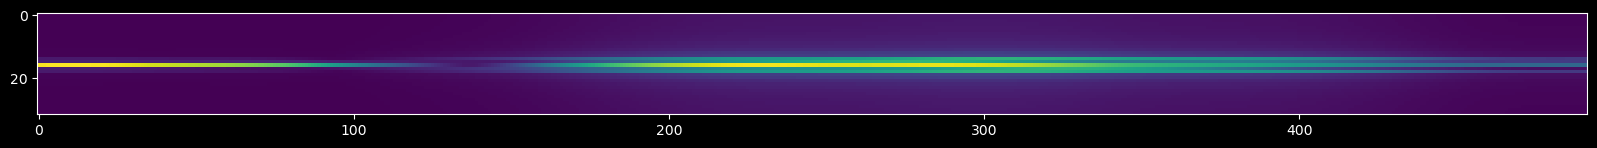

In [35]:
plt.figure(figsize=(20,10))

plt.imshow(x_orig)